__Cargar librerías__

In [1]:
import os
import sys
import getpass
import bz2
import pickle # Rick!
import copy

import numpy as np
import pandas as pd
import math

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

__Cargar datos__

In [2]:
df_5m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_5m.csv")
df_15m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_15m.csv")
df_30m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_30m.csv")
df_45m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_45m.csv")
df_60m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_60m.csv")
df_75m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_75m.csv")
df_90m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_90m.csv")
df_120m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_120m.csv")

__Comprobar si hay NAs__

In [78]:
pd.isnull(df_60m).values.any()

False

__Comprobar sparsity por variables__

Las variables de salinidad tienen más un 97% de valores 0. Las de acumulación de precipitación en torno a un 30%.

In [79]:
(df_60m == 0).mean()

qp_ra_t-2    0.341714
sa_t-2       0.972571
vs_t-2       0.000000
hr_t-2       0.000000
at_t-2       0.000000
st_t-2       0.000000
td_t-2       0.000000
gr_t-2       0.000000
ws_t-2       0.004571
wd_t-2       0.000000
ap_t-2       0.000000
qp_ra_t-1    0.333714
sa_t-1       0.971429
vs_t-1       0.000000
hr_t-1       0.000000
at_t-1       0.000000
st_t-1       0.000000
td_t-1       0.000000
gr_t-1       0.000000
ws_t-1       0.003429
wd_t-1       0.000000
ap_t-1       0.000000
qp_ra_t-0    0.283429
sa_t-0       0.964571
vs_t-0       0.000000
hr_t-0       0.000000
at_t-0       0.000000
st_t-0       0.000000
td_t-0       0.000000
gr_t-0       0.000000
ws_t-0       0.002286
wd_t-0       0.000000
ap_t-0       0.000000
min          0.000000
dur          0.000000
dtype: float64

__Ver la correlación entre velocidades de viento__

In [80]:
np.corrcoef([df_60m["ws_t-0"],df_60m["ws_t-1"], df_60m["ws_t-2"]])

array([[1.        , 0.94789251, 0.89703496],
       [0.94789251, 1.        , 0.95918938],
       [0.89703496, 0.95918938, 1.        ]])

<IPython.core.display.Javascript object>


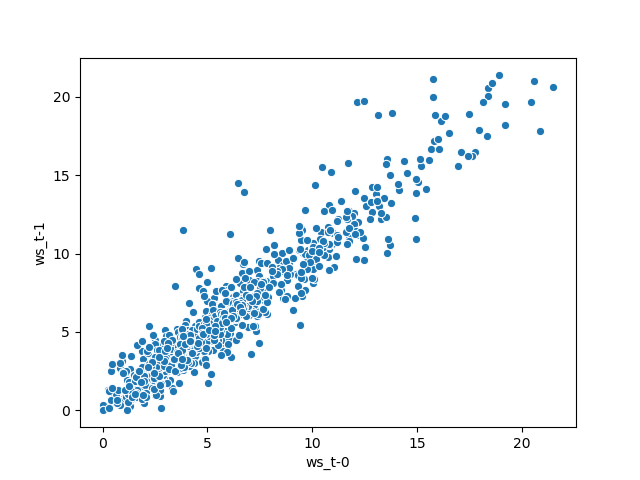

In [130]:
sns.scatterplot(df_60m["ws_t-0"],df_60m["ws_t-1"]);
#sns.scatterplot(data=[df_60m["ws_t-0"],df_60m["ws_t-1"], df_60m["ws_t-2"]])

__Correlación entre la media de velocidades de viento en los 3 instantes anteriores y la mínima visibilidad__

Correlación muy baja

<IPython.core.display.Javascript object>


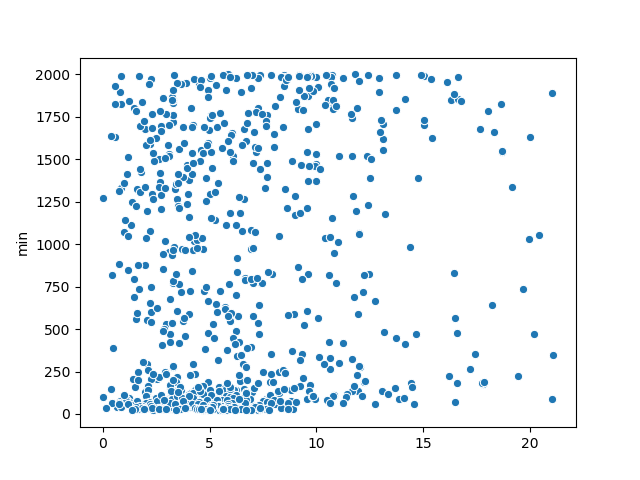

array([[1.        , 0.21602629],
       [0.21602629, 1.        ]])

In [131]:
sns.scatterplot(x=np.mean([df_60m["ws_t-0"],df_60m["ws_t-1"], df_60m["ws_t-2"]], axis=0),
               y=df_60m["min"]);

np.corrcoef(np.mean([df_60m["ws_t-0"],df_60m["ws_t-1"], df_60m["ws_t-2"]], axis=0),
            df_60m["min"])

__Correlación con sólo una hora de antelación__

<IPython.core.display.Javascript object>


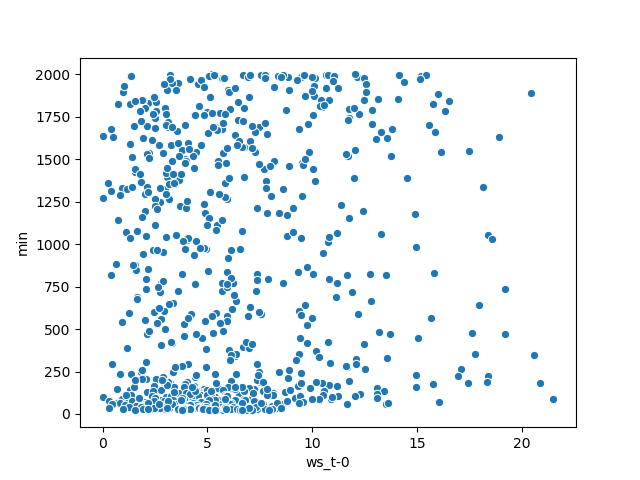

In [65]:
sns.scatterplot(x=df_60m["ws_t-0"],y=df_60m['min']);